<h1>Feature Analysis on US Home Prices Dataset</h3>

<h3>First, lets import all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest,mutual_info_regression,VarianceThreshold,r_regression
import matplotlib.pyplot as plt
import seaborn as sns

<h3> Importing the dataset

In [2]:
df=pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

<h3> Performing basic EDA operations

In [20]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [26]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64

In [32]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

In [3]:
#lets drop features which are not numerical

df.drop(['date','street','city','statezip','country'],inplace=True,axis=1)
X=df.drop('price',axis=1)
y=df.price

<h3>For feature selection and checking which one of these parameters have maximum impact on the target variable,
I will be using three methods-<p><br>


1) Filter methods

2) Wrapper methods

3) Embedded methods

<h3> 1) Filter methods- Pearson's correlation

In [4]:
# correlation for the entire dataset
corr_matrix = df.corr()
corr_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


<h3> Now let's create a heatmap to check the Collinearity between variables

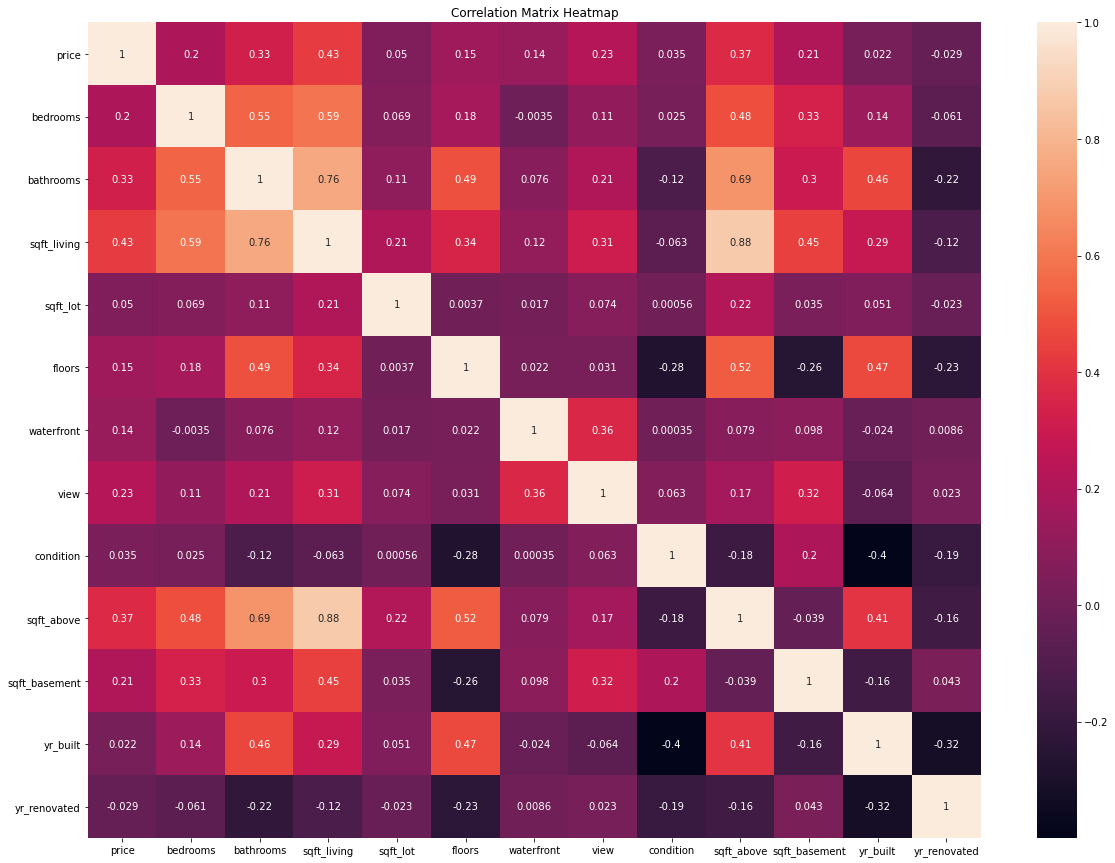

In [8]:
fig, ax = plt.subplots(figsize=(20, 15))

# Lets create a heatmap to check the colinearity between variables
heatmap = sns.heatmap(corr_matrix, annot=True)
heatmap.set_title('Correlation Matrix Heatmap')
plt.show()

<h3> The above heatmap represent the features in dark that are not closely related to each other, whereas the ones which are
light in color are very much closely related to each other.

<h3>Now, lets utilize SelectKBest class for extracting the best features from our dataset. 
The SelectKBest method selects the features according to the k highest score.

In [10]:
mostcorr=SelectKBest(r_regression,k=11)
new_X=mostcorr.fit_transform(X, y)
mostcorr.get_feature_names_out()

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built'], dtype=object)

In [11]:
#converting the above array to dataframe

pd.DataFrame(new_X,columns=mostcorr.get_feature_names_out())

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
0,3.0,1.50,1340.0,7912.0,1.5,0.0,0.0,3.0,1340.0,0.0,1955.0
1,5.0,2.50,3650.0,9050.0,2.0,0.0,4.0,5.0,3370.0,280.0,1921.0
2,3.0,2.00,1930.0,11947.0,1.0,0.0,0.0,4.0,1930.0,0.0,1966.0
3,3.0,2.25,2000.0,8030.0,1.0,0.0,0.0,4.0,1000.0,1000.0,1963.0
4,4.0,2.50,1940.0,10500.0,1.0,0.0,0.0,4.0,1140.0,800.0,1976.0
...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510.0,6360.0,1.0,0.0,0.0,4.0,1510.0,0.0,1954.0
4596,3.0,2.50,1460.0,7573.0,2.0,0.0,0.0,3.0,1460.0,0.0,1983.0
4597,3.0,2.50,3010.0,7014.0,2.0,0.0,0.0,3.0,3010.0,0.0,2009.0
4598,4.0,2.00,2090.0,6630.0,1.0,0.0,0.0,3.0,1070.0,1020.0,1974.0


<h3>The features that can influence our target variable(price) acc to SelectKBest are-<br><br>
1. bedrooms<br>
2. bathrooms<br>
3. sqft_living<br>
4. sqft_lot<br>
5. floors<br>
6. waterfront<br>
7. view<br>	
8. condition<br>
9. sqft_above<br>
10. sqft_basement<br>
11. yr_built<br>

<h3>2) Wrapper methods- Recursive Feature Elimination(RFE)

In [12]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=6, step=1)
selector = selector.fit(X, y)
selector.support_

array([ True,  True,  True, False,  True, False,  True, False, False,
       False,  True, False])

In [13]:
#feature ranking

selector.ranking_

array([1, 1, 1, 7, 1, 5, 1, 2, 3, 4, 1, 6])

In [14]:
selector.feature_names_in_

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'], dtype=object)

In [15]:
# now lets get the features selected by RFE

selector.get_feature_names_out()

array(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view',
       'yr_built'], dtype=object)

<h3>The features that can influence our target variable(price) acc to RFE are-<br><br>

1. Bedrooms
2. Bathrooms
3. sqft_living
4. floors
5. view
6. yr_built

<h3>3) Embedded Methods

<h3>In embedded methods, I will be using L1- Lasso regression as it will add a small penalty to the different parameters of the machine learning model to avoid over-fitting.

In [16]:
from sklearn.linear_model import Lasso

In [17]:
model = Lasso()
model.fit(X, y)
absolute_coefficients = np.abs(model.coef_)
feature_importance = dict(zip(X.columns, absolute_coefficients))
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

waterfront: 355188.2835866434
bedrooms: 58040.43033302903
bathrooms: 57195.64377065079
view: 45703.27803640009
floors: 39803.079274458774
condition: 31839.60167248714
yr_built: 2378.212546257637
sqft_living: 270.4018038184765
sqft_basement: 38.615042333470235
sqft_above: 8.949145945959641
yr_renovated: 6.571367112846591
sqft_lot: 0.6912597710369842


C:\Users\viplo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.254e+14, tolerance: 1.462e+11
  model = cd_fast.enet_coordinate_descent(


<h3>In the above model, the features with the highest importance scores have more correlation with the target variable compared to the ones with less importance scores.

<h3>Secondly, I will be utilising the capabilities of a decision tree regressor model to realise the importance of the features 
present in our dataset

In [19]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X, y)

feature_importances = dt_reg.feature_importances_

feature_importance = dict(zip(X.columns, feature_importances))
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

condition: 0.3209730204313103
sqft_living: 0.24184178177680754
yr_built: 0.18196265358434766
yr_renovated: 0.060132977106418795
sqft_basement: 0.05248355610838829
sqft_lot: 0.049378553949720294
sqft_above: 0.023474968631936065
bathrooms: 0.019685227150124874
view: 0.018922712873882364
waterfront: 0.017303093541938895
bedrooms: 0.009826254604169887
floors: 0.004015200240955045


<h3>Similarly, I have organised the features as per their importance scores/correlation with the target variable(price) 
to see which variable is the best suited to influence our target variable.